In [1]:
# Main library: https://square.github.io/pysurvival/index.html
#----------------------------Reproducible------------------------------------------
import numpy as np
import random as rn
import pandas as pd
import gc
import os

seed=0
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
rn.seed(seed)

#----------------------------Reproducible------------------------------------------

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from sklearn.model_selection import train_test_split
from pysurvival.models.semi_parametric import NonLinearCoxPHModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import integrated_brier_score
from pysurvival.utils.display import display_loss_values
from pysurvival.utils.display import compare_to_actual

from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt
from scipy import stats
from collections import Counter

import heapq
import seaborn as sns

In [2]:
def csv_read(p_path):
    pd_data=pd.read_csv(p_path, sep=',',header=None)
    column_names=pd_data.columns.values.tolist()
    return np.array(pd_data),column_names

def csv_read_with_header(p_path):
    pd_data=pd.read_csv(p_path, sep=',')
    column_names=pd_data.columns.values.tolist()
    return np.array(pd_data),np.array(column_names)

def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t",f_t, p_value_t)
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",f_t, p_value_t)
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",f, p_value)
    print("-"*80)
    print("\n")
    
#-------------------------------------------------------------------------------------
def draw_bar(p_data,p_title):
    fz=20
    params = {'figure.figsize': '8, 6'}
    plt.rcParams.update(params)
    width=0.3

    colors=['#d5695d','#5d8ca8','green','purple']

    different_elements_keys=np.unique(p_data)
    keys_values = Counter(p_data)
    total_counts=np.sum([*keys_values.values()])
    total_index=np.arange(len(different_elements_keys))
    for i in total_index:
        different_elements_keys_i=different_elements_keys[i]
        rects_1=plt.bar(i,keys_values[different_elements_keys_i]/total_counts,width,color=colors[i])

    plt.xticks(total_index,different_elements_keys,fontsize=fz)
    plt.yticks(np.arange(0,1,0.2),fontsize=fz)
    plt.ylim(0,1)
    plt.title(p_title)
    plt.show()

Compared groups 4




./25/feature_selection.csv
./3/feature_selection.csv
--------------------------------------------------


selected_features_all {'NACCAGE', 'NACCVASC', 'NACCIDEM', 'NACCAGEB'}
selected_features_common {'NACCAGE', 'NACCAGEB'}
selected_features_diff {'NACCIDEM', 'NACCVASC'}
--------------------------------------------------
All different features 2




--------------------------------------------------------------------------------
Group 1: [0 0 8 1 0 8 0 1 8 8 8 0 8 1 0 0 8 0 0 1 1 1 1 8 1 0 8 0 1 1 8 0 0 8 1 0 8
 1 8 1 0 1 8 1 1 1 0 0 0 0 0 1 8 8 8 1 0 0 1 8 0 8 0 8 1 1 8 1 8 0 1 0 0 0
 1 8 0 1 1 8 0 0 1 8 8 1 1 8 8 1 0 0 8 0 1 1 8 0 0 0 0 0 8 1 0 8 0 0 8 1 8
 8 8 1 0 8 8 0 1 1 0 8 1 1 1 1 8 1 0 1 8 0 0 1 1 8 0 0 0 0 0 8 8 8 0 8 8 1
 8 0 0 1 8 1 8 8 1 8 0 1 8 0 8 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 8 0 0 0 0 0
 0 8 8 8 0 0 0 8 0 8 0 1 8 8 8 0 1 8 0 8 1 1 1 0 8 8 1 1 8 0 1 8 8 1 0 1 1
 1 1 0 0 8 0 8 8 0 0 0 8 8 1 8 0 8 8 1 1 0 8 1 1 0 1 0 0 0 1 1 8 0 8 1 0 0
 1 0 0 0 8

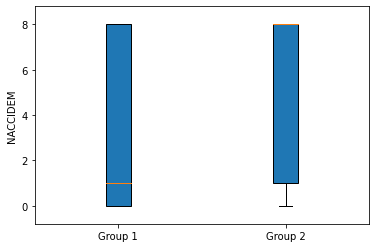



--------------------------------------------------------------------------------
Group 1: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1

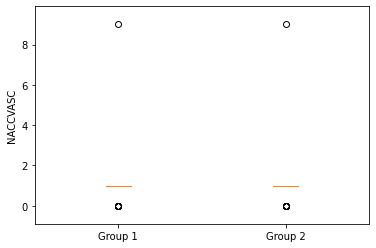

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%





./3/feature_selection.csv
./4/feature_selection.csv
--------------------------------------------------


selected_features_all {'NACCAGE', 'NACCPPA', 'NACCIDEM', 'NACCAGEB'}
selected_features_common {'NACCIDEM', 'NACCAGEB'}
selected_features_diff {'NACCAGE', 'NACCPPA'}
--------------------------------------------------
All different features 2




--------------------------------------------------------------------------------
Group 1: [84 72 52 59 90 70 81 60 80 71 78 75 67 93 92 61 75 81 91 54 80 74 51 83
 65 73 87 88 67 76 84 81 70 73 34 73 65 42 72 61 76 61 93 64 62 70 79 95
 68 75 63 73 91 88 63 85 76 74 68 73 36 89 58 50 70 66 97 83 53 99 77 74
 72 83 81 62 79 80 82 81 75 75 63 81 59 76 76 51 79 81 69 72 67 78 59 68
 76 64 63 76 93 72 83

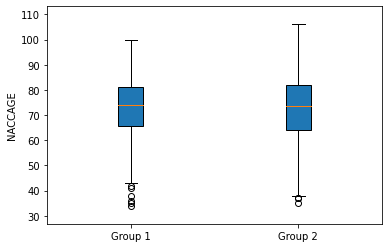



--------------------------------------------------------------------------------
Group 1: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 7 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 7
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 8 0 0 0 0 0 0 1
 0 0 1 0

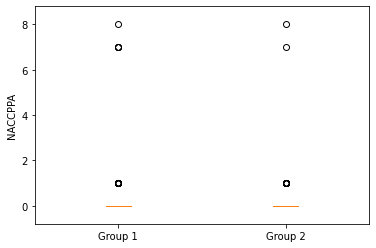

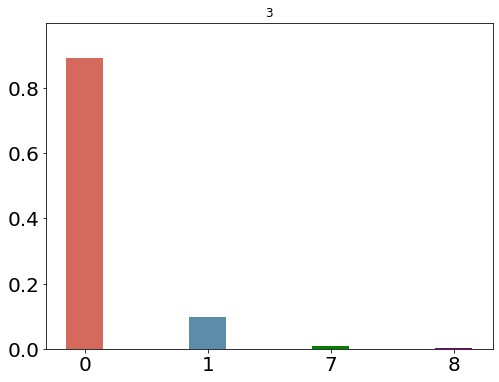

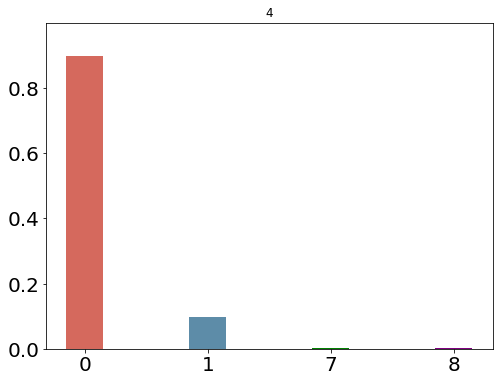

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%





./25/feature_selection.csv
./51/feature_selection.csv
--------------------------------------------------


selected_features_all {'NACCAGE', 'NACCVASC', 'NACCIDEM', 'NACCAGEB'}
selected_features_common {'NACCAGE', 'NACCAGEB'}
selected_features_diff {'NACCIDEM', 'NACCVASC'}
--------------------------------------------------
All different features 2




--------------------------------------------------------------------------------
Group 1: [0 0 8 1 0 8 0 1 8 8 8 0 8 1 0 0 8 0 0 1 1 1 1 8 1 0 8 0 1 1 8 0 0 8 1 0 8
 1 8 1 0 1 8 1 1 1 0 0 0 0 0 1 8 8 8 1 0 0 1 8 0 8 0 8 1 1 8 1 8 0 1 0 0 0
 1 8 0 1 1 8 0 0 1 8 8 1 1 8 8 1 0 0 8 0 1 1 8 0 0 0 0 0 8 1 0 8 0 0 8 1 8
 8 8 1 0 8 8 0 1 1 0 8 1 1 1 1 8 1 0 1 8 0 0 1 1 8 0 0 0 0 0 8 8 8 0 8 8 1
 8 0 0 1 

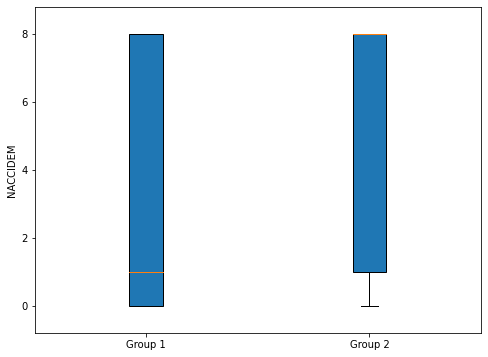



--------------------------------------------------------------------------------
Group 1: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1

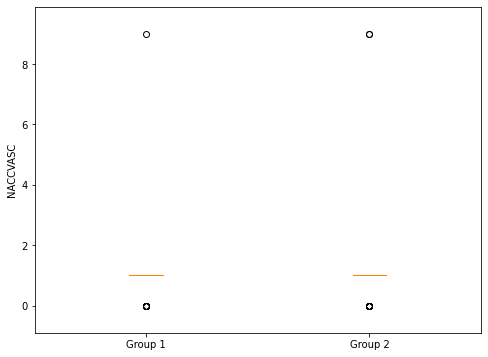

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%





./53/feature_selection.csv
./4/feature_selection.csv
--------------------------------------------------


selected_features_all {'NACCAGE', 'NACCPPA', 'NACCIDEM', 'NACCAGEB'}
selected_features_common {'NACCIDEM', 'NACCAGEB'}
selected_features_diff {'NACCAGE', 'NACCPPA'}
--------------------------------------------------
All different features 2




--------------------------------------------------------------------------------
Group 1: [72 90 84 92 72 66 52 90 59 90 70 81 60 68 80 71 78 75 76 75 76 74 93 67
 85 52 93 92 61 75 81 91 71 54 82 62 94 92 80 74 86 51 76 83 65 91 73 87
 88 67 62 76 77 84 89 81 70 73 34 73 65 42 72 61 76 73 71 76 99 61 70 92
 93 61 64 62 70 79 95 68 91 91 75 63 93 73 90 69 91 88 74 63 85 73 80 76
 74 68 73 87 36 96 8

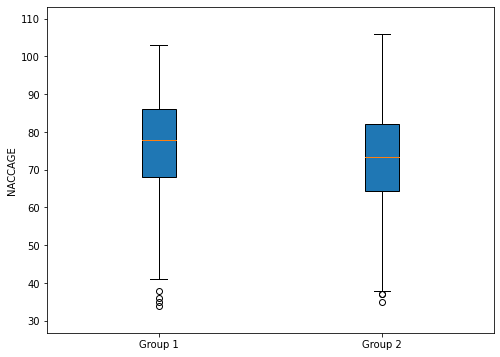



--------------------------------------------------------------------------------
Group 1: [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 8 0 0 8 0 0 0 0 0 0 0 1 0 8 0 7
 0 0 0 8 0 7 0 0 0 0 0 0 0 7 0 7 0 0 0 0 0 0 0 0 0 0 1 8 8 8 0 0 0 7 0 0 0
 0 0 0 0 0 0 8 8 0 1 8 0 8 0 0 0 1 0 0 7 8 0 0 0 0 7 0 8 0 8 1 0 0 8 0 0 0
 0 8 7 0 0 0 1 0 0 0 0 0 7 8 7 1 0 0 0 0 0 0 8 8 7 8 0 7 0 0 0 0 0 8 0 0 0
 8 0 1 0 0 0 0 0 0 0 0 0 8 0 0 8 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 8 0
 0 0 0 0 0 7 8 8 0 7 0 0 0 8 0 0 0 0 0 1 8 8 1 0 0 0 0 0 1 0 1 7 0 0 0 0 0
 1 0 8 0 8 8 1 8 7 0 8 8 8 8 8 8 0 0 0 0 0 0 0 7 8 8 0 0 0 0 7 0 0 8 0 0 1
 8 7 7 0 0 0 0 7 0 0 0 0 0 0 1 0 0 8 0 0 0 8 0 0 1 0 0 0 1 7 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 7 0 0 8 0 0 7 8 0 1 0 1 0 0 0 0 0 1 7 0 0 0 0
 0 7 1 0 0 0 0 0 7 8 8 0 0 0 0 0 0 8 0 0 0 8 8 0 0 0 8 8 0 0 7 7 8 8 0 0 0
 8 7 1 8 7 0 8 8 0 7 0 7 0 0 0 0 0 8 0 0 0 0 0 0 0 8 0 8 0 0 0 0 7 7 1 0 0
 0 0 0 0 1 8 0 0 0 0 0 0 8 0 0 0 8 0 0 1 0 0 0 1 0 0 0 0 1 1 7 0 0 0 1 0 0
 0 8 0 1

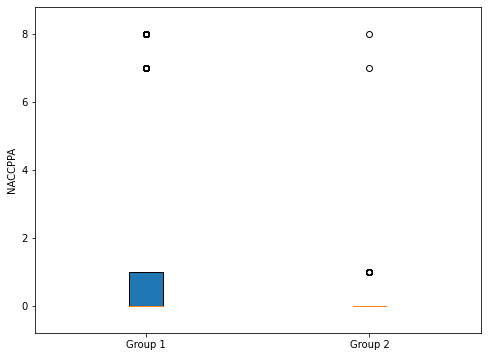

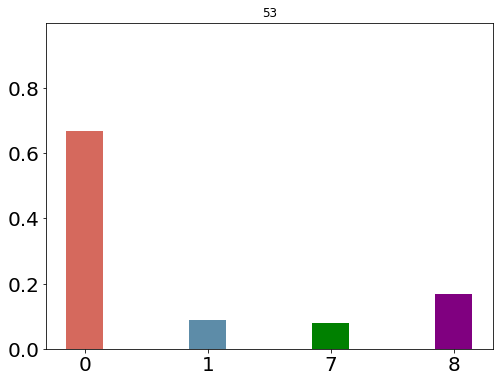

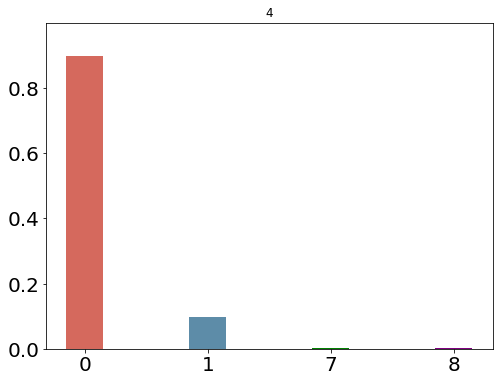

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%







In [3]:
used_number_features=3
Compared_groups=[(25,3),(3,4),(25,51),(53,4)]

print("Compared groups", len(Compared_groups))
print("\n\n\n")

features_common=False# "features_common=True" shows the bar figures for common selected features; features_all=True, it shows the bar figures for all union selected features, otherwise, it shows the bar figures for different union selected features.
features_all=False

for file_name_1,file_name_2 in Compared_groups:
    path1='./'+str(file_name_1)+'/feature_selection.csv'
    path2='./'+str(file_name_2)+'/feature_selection.csv'
    print(path1)
    print(path2)
    print("-"*50)
    print("\n")
    
    data1_,_=csv_read(path1)
    data1=data1_[-1,0:used_number_features]
    data2_,_=csv_read(path2)
    data2=data2_[-1,0:used_number_features]
    
    selected_features_all=set(data1).union(set(data2))
    selected_features_common=set(data1).intersection(set(data2))
    
    selected_features_diff=selected_features_all-selected_features_common
        
    print("selected_features_all",selected_features_all)
    print("selected_features_common",selected_features_common)
    print("selected_features_diff",selected_features_diff)
    print("-"*50)
    
    inputdata1,column_names1=csv_read_with_header('./'+str(file_name_1)+'/data/survival_data_filtered_3.csv')
    inputdata2,column_names2=csv_read_with_header('./'+str(file_name_2)+'/data/survival_data_filtered_3.csv')
                
    if features_common:
        selected_features_common_list=list(selected_features_common)
        print("Common features", len(selected_features_common_list))
        print("\n")
        
        for i in np.arange(len(selected_features_common_list)):
            index1_i=np.where(column_names1==selected_features_common_list[i])[0][0]
            index2_i=np.where(column_names2==selected_features_common_list[i])[0][0]
        
            group1=inputdata1[:,index1_i]
            group2=inputdata2[:,index2_i]
            y_label=selected_features_common_list[i]
            
            print("\n")
            print("-"*80)
            print("Group 1:", group1)
            print("Average of Group 1:", np.mean(group1))
            print("Group 2:", group2)
            print("Average of Group 2:", np.mean(group2))
            print("-"*80)
            print("\n")
            
            statistic_analysis(group1, group2)

            bar_figure(group1,group2,y_label)
    elif features_all:
        selected_features_all_list=list(selected_features_all)
    
        print("All union features", len(selected_features_all_list))
        print("\n")
        
        for i in np.arange(len(selected_features_all_list)):
            index1_i=np.where(column_names1==selected_features_all_list[i])[0][0]
            index2_i=np.where(column_names2==selected_features_all_list[i])[0][0]
        
            group1=inputdata1[:,index1_i]
            group2=inputdata2[:,index2_i]
            y_label=selected_features_all_list[i]
            
            print("\n")
            print("-"*80)
            print("Group 1:", group1)
            print("Average of Group 1:", np.mean(group1))
            print("Group 2:", group2)
            print("Average of Group 2:", np.mean(group2))
            print("-"*80)
            print("\n")
            
            statistic_analysis(group1, group2)

            bar_figure(group1,group2,y_label)
    else:
        selected_features_diff_list=list(selected_features_diff)
    
        print("All different features", len(selected_features_diff_list))
        print("\n")
        
        for i in np.arange(len(selected_features_diff_list)):
            
            index1_i=np.where(column_names1==selected_features_diff_list[i])[0][0]
            index2_i=np.where(column_names2==selected_features_diff_list[i])[0][0]
        
            group1=inputdata1[:,index1_i]
            group2=inputdata2[:,index2_i]
            y_label=selected_features_diff_list[i]
            
            print("\n")
            print("-"*80)
            print("Group 1:", group1)
            print("Average of Group 1:", np.mean(group1))
            print("Group 2:", group2)
            print("Average of Group 2:", np.mean(group2))
            print("-"*80)
            print("\n")
            
            statistic_analysis(group1, group2)

            bar_figure(group1,group2,y_label)
            
            #if selected_features_diff_list[i]=='NACCPPA':
            #    draw_bar(group1,file_name_1)
                
            #    draw_bar(group2,file_name_2)
            
    
    print("%"*120)
    print("%"*120)
    print("\n\n\n\n")